<a href="https://colab.research.google.com/github/jefersonfreittas1/Python-Tutorial/blob/main/check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplos aplicados em Engenharia Química
A extração de ácido benzóico de uma solução aquosa pode ser feita utilizando benzeno como solvente em um ou mais extratores em série. O ácido benzóico é quatro vezes mais solúvel em benzeno que em água. Calcule a fração de ácido benzóico na saída da corrente i+1 para um ou mais extratores em série utilizando uma estrutura de repetição.
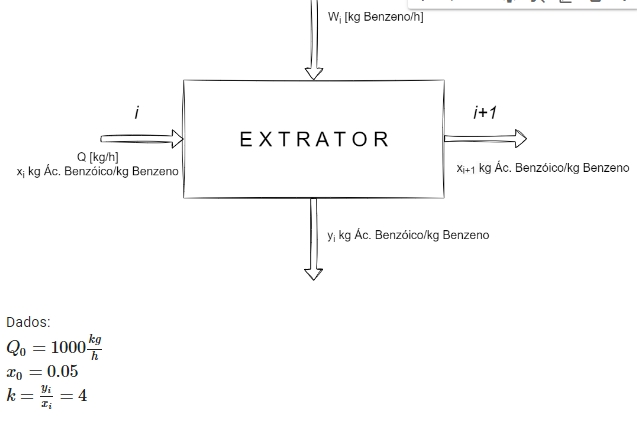

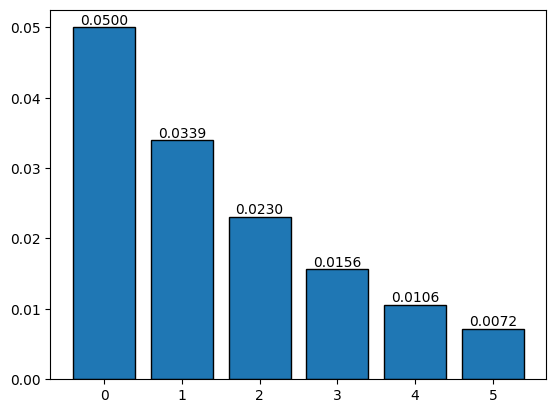

In [ ]:
#simplificado
import numpy as np
import matplotlib.pyplot as plt

NE = 5
Q, W, k = 1000, 118.4, 4
x = np.zeros(NE+1)
x[0] = 0.05

for i in range(NE):
    x[i+1] = (Q * x[i]) / (Q + W * k)

plt.bar(range(NE+1), x, edgecolor="black")

# Adiciona os valores diretamente sobre as barras
for i in range(NE+1):
    plt.text(i, x[i], f'{x[i]:.4f}', ha='center', va='bottom')

plt.show()


x[1] = 0.0339
x[2] = 0.0230
x[3] = 0.0156
x[4] = 0.0106
x[5] = 0.0072


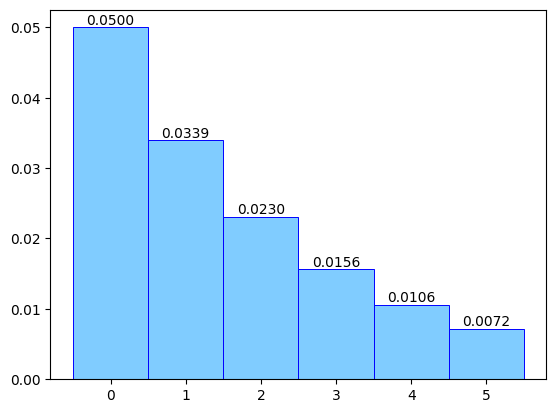

In [ ]:
#professor fez
import numpy as np                  # Biblioteca numérica
import matplotlib.pyplot as plt     # Biblioteca para gráficos

# Número de extratores
NE = 5
# Pré-alocação de vetores
x = np.zeros(NE+1)
y = np.zeros(NE)

# Dados do problema
Q = 1000
W = 118.4
x[0] = 0.05
k = 4           # Coeficiente de distribuição

for i in range(NE):
    y[i] = k*x[i]
    x[i+1] = (Q*x[i])/(Q+W*k)
    print(f'x[{i+1}] = {x[i+1]:.4f}')

# Plot
lista = []
for i in range(NE+1):
    lista.append(f'{x[i]:.4f}')

bar = plt.bar(np.arange(0,NE+1), x, width=1, edgecolor="blue", color=[0.5,0.8,1], linewidth=0.7,label=lista)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.show()

x[1] = 0.0339
x[2] = 0.0230
x[3] = 0.0156
x[4] = 0.0106
x[5] = 0.0072


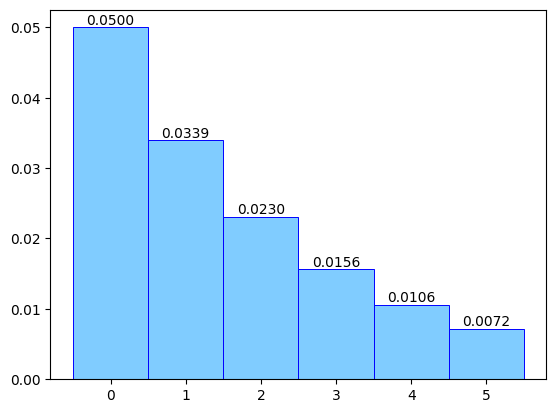

In [ ]:
#Que eu fiz
import numpy as np                  # Biblioteca numérica
import matplotlib.pyplot as plt     # Biblioteca para gráficos

# Número de extratores
NE = 5
# Pré-alocação de vetores
x = np.zeros(NE+1)
y = np.zeros(NE)

# Dados do problema
Q = 1000
W = 118.4
x[0] = 0.05
k = 4           # Coeficiente de distribuição

for i in range(NE):
    y[i] = k*x[i]
    x[i+1] = (Q*x[i])/(Q+W*k)
    print(f'x[{i+1}] = {x[i+1]:.4f}')

# Plot
lista = []
for i in range(NE+1):
    lista.append(f'{x[i]:.4f}')

bar = plt.bar(np.arange(0,NE+1), x, width=1, edgecolor="blue", color=[0.5,0.8,1], linewidth=0.7,label=lista)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.show()

In [ ]:
import numpy as np
from sympy import symbols, integrate
#Coeficientes
n = float(input("insira uma temperatura em °C "))
Ti = n +273.15
a = np.array([71.96e-3, 1.23e-1])
b = np.array([20.10e-5, 1.86e-4])
c = np.array([-12.78e-8, 0])
d = np.array([34.76e-12, 0])
#calor de vaporização
dhvap = 30.2*1000 #j/mol
Tf = 25 +273.15 #k
Te = 56 + 273.15 #k
nmols = 100
if Ti >= Te:
  print("Acetona em estado de vapor")
  #Cálculo do resfriamento
  #Ebulição -> Condensação -> Líquido
  qvap = a[0]*(Te-Ti) + b[0]*(Te**2-Ti**2)/2 + c[0]*(Te**3-Ti**3)/3 + d[0]*(Te**4-Ti**4)/4
  qebu = -dhvap
  qliq = a[1]*(Tf-Te) + b[1]*(Tf**2-Te**2)/2
  qtot = qvap+qebu+qliq
if Ti < Te:
  print("Acetona em estado líquido")
  qliq = a[1]*(Tf-Ti) + b[1]*(Tf**2-Ti**2)/2
  qtot = qliq
print(f'q necessário é {qtot:.2f} J/mol')
print(f'q necessário para 100 mols = {100*qtot:.2f} J/mol')

insira uma temperatura em °C 40
Acetona em estado líquido
q necessário é -2.70 J/mol
q necessário para 100 mols = -269.78 J/mol


In [ ]:
Exercicio 1
from sympy import symbols, integrate

# Definindo variáveis e coeficientes para o Cp
T = symbols('T')

# Coeficientes para vapor
a_vapor = 71.96e-3  # kJ/mol·K
b_vapor = 20.10e-5  # kJ/mol·K
c_vapor = -12.78e-8  # kJ/mol·K
d_vapor = 34.76e-12  # kJ/mol·K

# Calor específico Cp para vapor
Cp_vapor = a_vapor + b_vapor * T + c_vapor * T**2 + d_vapor * T**3

# Limites de temperatura para o vapor (de 80°C a 56°C)
T_initial_vapor = 80 + 273.15  # Convertendo para Kelvin
T_final_vapor = 56 + 273.15  # Convertendo para Kelvin

# Integração para o calor do vapor (resfriamento de 80°C a 56°C)
q_vapor = integrate(Cp_vapor, (T, T_final_vapor, T_initial_vapor))

# Condensação (calor de vaporização)
n_moles = 100  # mol/s
delta_H_vap = 30.2  # kJ/mol
q_condensacao = n_moles * delta_H_vap

# Coeficientes para líquido
a_liquido = 1.23e-1  # kJ/mol·K
b_liquido = 1.86e-4  # kJ/mol·K

# Calor específico Cp para líquido
Cp_liquido = a_liquido + b_liquido * T

# Limites de temperatura para o líquido (de 56°C a 25°C)
T_initial_liquido = 56 + 273.15  # Convertendo para Kelvin
T_final_liquido = 25 + 273.15  # Convertendo para Kelvin

# Integração para o calor do líquido (resfriamento de 56°C a 25°C)
q_liquido = integrate(Cp_liquido, (T, T_final_liquido, T_initial_liquido))

# Somando as contribuições de todas as etapas
q_total = n_moles * (q_vapor + q_condensacao + q_liquido)
q_total.evalf()  # Resultado em kJ/s


In [ ]:
import numpy as np

# Criando um array unidimensional
array1d = np.array([1, 2, 3, 4, 5])
print("Array 1D:", array1d)

# Criando um array bidimensional (matriz)
array2d = np.array([[1, 2, 3], [4, 5, 6]])
print("Array 2D:\n", array2d)


Array 1D: [1 2 3 4 5]
Array 2D:
 [[1 2 3]
 [4 5 6]]


In [ ]:
lanche = (" Hamburguer"," Pudim", " Batata"," Pizza")
#for cont in range(0,len(lanche)):
  #print(f'Eu vou comer{lanche[cont]}')
for comida in lanche:
  print(f'Eu vou comer{comida}')


Eu vou comer Hamburguer
Eu vou comer Pudim
Eu vou comer Batata
Eu vou comer Pizza


In [ ]:
lanche = ("hamburguer", "água", "suco")
print(lanche[0:])
print(len(lanche))

('hamburguer', 'água', 'suco')
3
